<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


<Figure size 800x600 with 0 Axes>

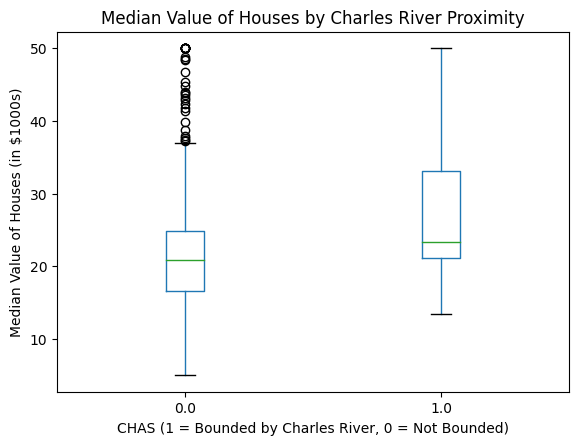

In [11]:
# Split data into two groups based on CHAS
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Boxplot for visualization
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='CHAS', grid=False)
plt.title("Median Value of Houses by Charles River Proximity")
plt.suptitle("")  # Remove automatic title
plt.xlabel("CHAS (1 = Bounded by Charles River, 0 = Not Bounded)")
plt.ylabel("Median Value of Houses (in $1000s)")
plt.show()

- Statistical Test Results:

T-statistic: 3.996
P-value: 7.39e-05

- The p-value is significantly less than 0.05, indicating a statistically significant difference in the median value of houses bounded by the Charles River (CHAS=1) compared to those not bounded (CHAS=0).

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


<Figure size 800x600 with 0 Axes>

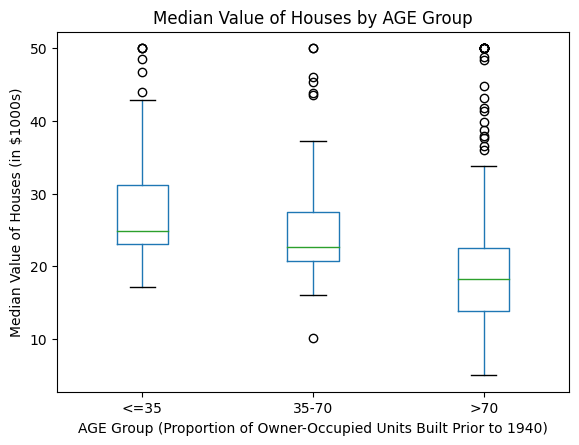

In [12]:
# Discretize AGE into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=["<=35", "35-70", ">70"])

# Perform ANOVA test
grouped_data = [boston_df[boston_df['AGE_Group'] == group]['MEDV'] for group in boston_df['AGE_Group'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)

# Output results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Boxplot for visualization
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='AGE_Group', grid=False)
plt.title("Median Value of Houses by AGE Group")
plt.suptitle("")  # Remove automatic title
plt.xlabel("AGE Group (Proportion of Owner-Occupied Units Built Prior to 1940)")
plt.ylabel("Median Value of Houses (in $1000s)")
plt.show()

### Statistical Test Results:

    - F-statistic: 36.408
    - P-value: 1.71e-15

The p-value is extremely small (much less than 0.05), indicating a statistically significant difference in the median values of houses (MEDV) among the different AGE groups.

### Visualization:

- The boxplot shows clear differences in the median value of houses for the three AGE groups:
    - Houses in areas where owner-occupied units were built predominantly before 1940 (>70%) tend to have lower median values.
    - In areas with a moderate proportion of older houses (35-70%), the median values are higher.
    - In areas where most houses are newer (<=35%), the median values are higher as well, suggesting a possible trend of newer housing correlating with higher median value.

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


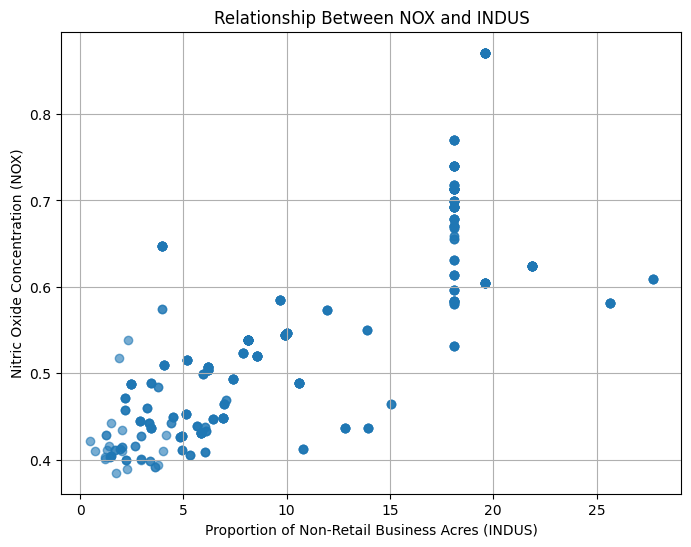

In [13]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output results
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6)
plt.title("Relationship Between NOX and INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.grid(True)
plt.show()


### Statistical Test Results:

    - Pearson Correlation Coefficient: 0.764
    - P-value: 7.91e-98

The Pearson correlation coefficient indicates a strong positive correlation between NOX (Nitric Oxide concentrations) and INDUS (proportion of non-retail business acres per town). The p-value is extremely small (much less than 0.05), which confirms that this correlation is statistically significant.

### Visualization:

    - The scatter plot shows an upward trend, where higher values of INDUS are associated with higher values of NOX.
    - This suggests that as the proportion of non-retail business acres increases, the Nitric Oxide concentration tends to rise, indicating a potential relationship between industrial activity and pollution levels.


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        10:21:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

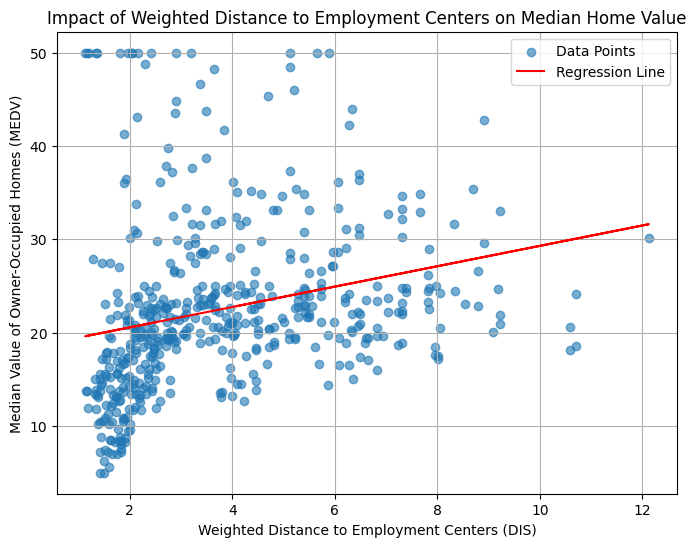

In [14]:
# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Output regression summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.6, label="Data Points")
plt.plot(boston_df['DIS'], model.predict(X), color='red', label="Regression Line")
plt.title("Impact of Weighted Distance to Employment Centers on Median Home Value")
plt.xlabel("Weighted Distance to Employment Centers (DIS)")
plt.ylabel("Median Value of Owner-Occupied Homes (MEDV)")
plt.legend()
plt.grid(True)
plt.show()

### Regression Equation:

- Intercept: 18.39
- Slope (DIS): 1.09
- The regression equation is:

      - MEDV = 18.39 + 1.09 ⋅ DIS

    This indicates that for each unit increase in weighted distance to employment centers (DIS), the median value of owner-occupied homes (MEDV) increases by approximately 1.09 units (in $1000s).

### Statistical Significance:

 - P-value for DIS: 0.000
   The p-value is well below 0.05, indicating that the relationship between DIS and MEDV is statistically significant.

### Model Performance:

    - R-squared: 0.062
    The model explains only about 6.2% of the variance in MEDV. This suggests that while DIS has a statistically significant impact on MEDV, other factors likely play a much larger role in determining home values.

### Visualization:

    The scatter plot shows a slight upward trend, consistent with the positive slope from the regression model. However, the spread of data points around the regression line indicates high variability, reinforcing the low R-squared value.

